In [1]:
#mounting google drive to access the input file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the input CSV file using pandas
input_file = "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Vehicles.csv"
vehicle_data = pd.read_csv(input_file)

In [4]:
#converting the CRASH_DATE column data to date time format
vehicle_data['CRASH_DATE'] = pd.to_datetime(vehicle_data['CRASH_DATE'])
#Declaring the start and end dates as per the given parameter file
start_date = '2017-10-01'
end_date = '2019-09-30'
#Filtering the data for the given period
filtered_data = vehicle_data.query('CRASH_DATE>=@start_date & CRASH_DATE<=@end_date')

#Uncomment the below line for the random seed data. considered the random value as 0 and the random state as date of birth
# filtered_data = filtered_data.sample(50, random_state=14021997)

#writting the clean data to a new file
filtered_data.to_csv("/content/Clean_Motor_Vehicle_Collisions.csv", index = False)
filtered_data

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
552,19140703,4213082,2019-09-23,8:15,eb3bee6c-2f18-47a4-adca-04c36d4284c2,NY,Sedan,HYUN -CAR/SUV,NaN,2016.0,...,Changing Lanes,Right Front Quarter Panel,Right Front Quarter Panel,NaN,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Unspecified
649,19140787,4209691,2019-09-20,15:00,9dcc52f9-96a7-43f0-9ded-eb34acd23b0c,NY,Motorcycle,DUCA -MCL,NaN,2010.0,...,Going Straight Ahead,Left Front Quarter Panel,Left Side Doors,Left Rear Quarter Panel,No Damage,No Damage,N,NaN,Unspecified,Unspecified
861,19140987,4212369,2019-09-24,6:30,6599b5c8-2922-41a5-b59b-3a2c0b90c360,NY,Motorcycle,KAWK -MCL,NaN,2009.0,...,Going Straight Ahead,Other,Center Front End,Center Back End,NaN,NaN,N,NaN,Other Vehicular,Unspecified
1069,19140989,4212369,2019-09-24,6:30,6c47aa77-f633-43f3-aa2a-a125d7718616,NY,Sedan,HOND -CAR/SUV,NaN,2009.0,...,Going Straight Ahead,Center Back End,Center Back End,NaN,NaN,NaN,N,NaN,Other Vehicular,Unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693370,20113435,4060927,2019-01-01,17:00,ea2d2b88-d405-4233-b0e2-a0c5988cb18f,NY,Sedan,ACUR -CAR/SUV,NaN,2015.0,...,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Bumper,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
3693408,20113234,3941815,2018-07-12,14:05,e24a9d19-d2a3-41ef-b204-cd52fb64c9e1,PA,Station Wagon/Sport Utility Vehicle,CHRY -CAR/SUV,NaN,2001.0,...,Stopped in Traffic,Right Front Bumper,Right Front Bumper,Right Front Quarter Panel,Right Side Doors,No Damage,N,NaN,Unspecified,Unspecified
3696317,20112801,3871272,2018-03-26,16:15,4f442edd-5dcf-40bc-87ca-19b8abc60bea,NJ,Station Wagon/Sport Utility Vehicle,freightliner,NaN,2005.0,...,Backing,Center Back End,NaN,NaN,NaN,NaN,N,NaN,Backing Unsafely,Unspecified
3698894,20099855,4063673,2019-01-07,12:45,ae6c19f2-30a0-4892-8f08-d80fcbb057c6,NJ,Sedan,HYUN -CAR/SUV,NaN,2012.0,...,Going Straight Ahead,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,Center Front End,Left Front Bumper,N,NaN,Unspecified,Unspecified


In [5]:
#Reading the clean data from the newly created file 
clean_data = pd.read_csv("/content/Clean_Motor_Vehicle_Collisions.csv")

#Cleaning the data for the required columns and then checking if sum is zero for the four major usage columns
clean_data=clean_data.dropna(subset=['VEHICLE_MAKE', 'VEHICLE_YEAR', 'CRASH_DATE','VEHICLE_TYPE'])
clean_data.isna().sum()

UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION                472
VEHICLE_TYPE                        0
VEHICLE_MAKE                        0
VEHICLE_MODEL                  800347
VEHICLE_YEAR                        0
TRAVEL_DIRECTION                 1420
VEHICLE_OCCUPANTS                6128
DRIVER_SEX                     112495
DRIVER_LICENSE_STATUS          123897
DRIVER_LICENSE_JURISDICTION    122503
PRE_CRASH                        3701
POINT_OF_IMPACT                  2988
VEHICLE_DAMAGE                   4579
VEHICLE_DAMAGE_1               281249
VEHICLE_DAMAGE_2               415006
VEHICLE_DAMAGE_3               506902
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    800347
CONTRIBUTING_FACTOR_1            1124
CONTRIBUTING_FACTOR_2            2215
dtype: int64

In [6]:
#created a function to get the count of each vehicle type ('NISS|GMC|MITS|VOLK') for the each given year
bar_data = clean_data[(clean_data.VEHICLE_MAKE.str.contains('NISS|GMC|MITS|VOLK')) & (clean_data.VEHICLE_YEAR > 2016) & (clean_data.VEHICLE_YEAR < 2020)]
def modifyName(Name):
  bar_data['VEHICLE_MAKE'][bar_data.VEHICLE_MAKE.str.contains(Name)] = Name

modifyName("NISS")
modifyName("GMC")
modifyName("VOLK")
modifyName("MITS")

#Grouping the data by VEHICLE_YEAR and getting the count
data = (bar_data.groupby(['VEHICLE_MAKE', 'VEHICLE_YEAR'])['VEHICLE_YEAR'].count()).unstack(0)
data

VEHICLE_MAKE,GMC,MITS,NISS,VOLK
VEHICLE_YEAR,,,,
2017.0,1139,514,11600,1464
2018.0,587,441,6032,829
2019.0,248,135,1746,379


In [7]:
#Modified Data to see only the Vehicle type for the Column VEHICLE_MAKE
bar_data

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
80,16700582,3907632,2018-05-21,19:28,09933b0b-3835-4697-a005-c6bd68336197,NY,Sedan,MITS,NaN,2017.0,...,Avoiding Object in Roadway,Center Front End,Center Front End,Right Front Bumper,Left Front Bumper,No Damage,N,NaN,Pavement Defective,Unspecified
201,16704246,3909918,2018-05-22,6:00,ebf2fc65-b4c9-453a-ac9f-92c17fa39a94,NY,Sedan,NISS,NaN,2017.0,...,Parked,Left Rear Bumper,Left Rear Bumper,Left Rear Quarter Panel,Center Back End,Left Side Doors,N,NaN,Unspecified,Unspecified
290,16687192,3901427,2018-05-15,20:00,9700203d-62b7-47eb-a285-95154e0e5bfb,NY,Station Wagon/Sport Utility Vehicle,NISS,NaN,2018.0,...,Parked,Right Side Doors,Right Side Doors,Right Side Doors,Right Side Doors,Right Side Doors,N,NaN,Unspecified,Unspecified
373,16696597,3905585,2018-05-22,16:59,c355b811-ecef-44aa-ace2-d2762a60e004,NY,Station Wagon/Sport Utility Vehicle,NISS,NaN,2018.0,...,Going Straight Ahead,Center Back End,Center Back End,NaN,NaN,NaN,N,NaN,Unspecified,Alcohol Involvement
419,16699177,3907112,2018-05-21,19:53,299c3b85-9736-443b-a02f-fe15fd034874,NJ,Sedan,NISS,NaN,2017.0,...,Stopped in Traffic,Left Front Bumper,Left Front Bumper,Center Front End,NaN,NaN,N,NaN,Unspecified,Unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908774,19844946,3767055,2017-10-02,11:00,30065662-dcad-47c5-bd56-f61e752695c2,NY,Sedan,NISS,NaN,2017.0,...,Making Right Turn,Left Front Quarter Panel,Left Front Quarter Panel,Left Rear Quarter Panel,Left Side Doors,NaN,N,NaN,Driver Inattention/Distraction,Driver Inexperience
908779,19849105,4070505,2019-01-25,17:50,fc5b5dde-8f6a-435c-8f7b-f68d0dc0d866,NY,Sedan,NISS,NaN,2017.0,...,Going Straight Ahead,Left Front Bumper,Left Front Bumper,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
908824,20021031,3890537,2018-04-29,14:15,8a679b91-8e03-4a3f-bbd9-03a44768d8c8,NY,Sedan,VOLK,NaN,2017.0,...,Slowing or Stopping,Center Back End,Center Back End,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
908826,20026067,4052428,2018-12-19,6:30,6df59988-757e-447c-bb72-6443e35dc8db,NY,Station Wagon/Sport Utility Vehicle,NISS,NaN,2017.0,...,Going Straight Ahead,Center Back End,Center Back End,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified


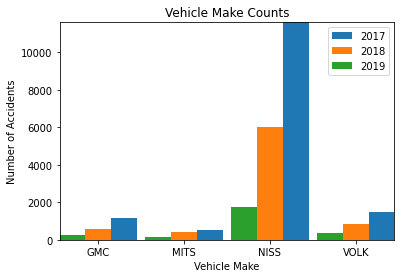

In [8]:
#Plotting Bar graph with the subplots
fig, accidentscount = plt.subplots()
x_axis = list(data.columns)

#Declaring the lables and the width
number_labels = np.arange(len(x_axis))
label_width = 0.3

#writing a function to set the exact width for each subplot and the count for each sub bar
def plotbar(year):
  label_width_m = label_width if year == 2017 else (0 if year == 2018 else -1 * label_width)
  accidentscount.bar(number_labels + label_width_m, list(data.loc[year]), label_width, label = str(year), align='center')
bar1, bar2, bar3 = plotbar(2017), plotbar(2018), plotbar(2019)

#Declaring Plot title, ylabel, xlabel, legend
plt.title('Vehicle Make Counts')
plt.ylabel('Number of Accidents')
plt.xlabel('Vehicle Make')
plt.xticks(number_labels, x_axis)
plt.legend()
plt.autoscale(tight=True)
plt.show()

In [9]:
#Converting the CRASH_DATE column to date time format
clean_data['CRASH_DATE'] = pd.to_datetime(clean_data['CRASH_DATE'])

#Since we are concentrating only on the month from complete date, removing the year and date
clean_data['CRASH_DATE']=clean_data['CRASH_DATE'].dt.strftime('%m')

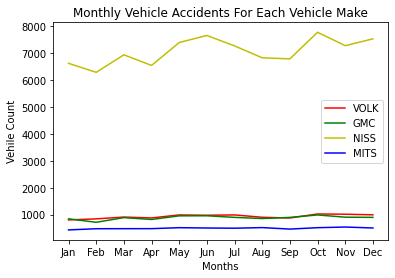

In [10]:
#Following funtion will retrun the count of each vehicle type for the respective months with the group by function.
def getMonthlyData(Name):
  return clean_data[clean_data['VEHICLE_MAKE'].str.contains(Name)].groupby(pd.Grouper(key='CRASH_DATE', axis=0))['VEHICLE_MAKE'].count().sort_index()

volk_monthly, gmc_monthly, niss_monthly, mits_monthly = getMonthlyData('VOLK'), getMonthlyData('GMC'), getMonthlyData('NISS'), getMonthlyData('MITS')

month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Plotting the line graph with the counts of each vehicle types and decalring the title, labels and legend
plt.plot(month, volk_monthly.values, 'r', label='VOLK')
plt.plot(month, gmc_monthly.values, 'g', label='GMC')
plt.plot(month, niss_monthly.values, 'y', label='NISS')
plt.plot(month, mits_monthly.values, 'b', label='MITS')
plt.title('Monthly Vehicle Accidents For Each Vehicle Make')
plt.ylabel('Vehile Count')
plt.xlabel('Months')
plt.legend()
plt.show()

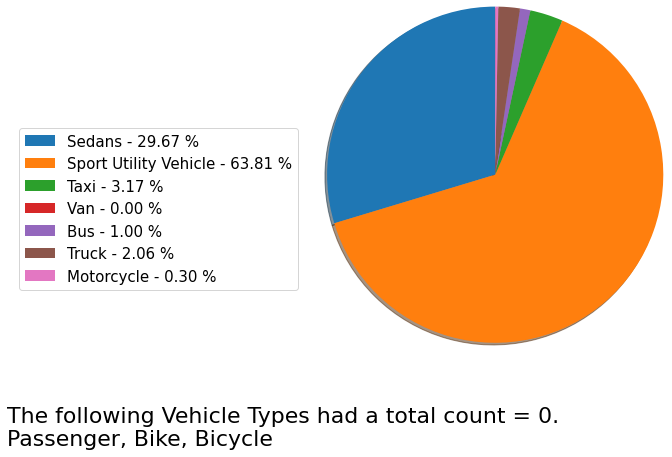

In [11]:
#Cleaning the VEHICLE_TYPE to make sure there is no null values being presented.
vehicle_types=clean_data.dropna(subset=['VEHICLE_TYPE'])

#writing a function to merge the similar and return the count for each vehicle type mentioned in paramter file.
def getBarData():
  pie_data = []
  for i in ['(Sedan|4 dr sedan|2 dr sedan)', '(PASSENGER)', '(SPORT UTILITY / STATION WAGON|Station Wagon/Sport Utility Vehicle|)', '(TAXI|Taxi)', '(VAN)', '(BIKE)', '(Bus)', '(Pick-up Truck|Box truck)', '(Motorcycle)', '(Bicycle)']:
    count = len(vehicle_types[vehicle_types['VEHICLE_TYPE'].str.contains(i)])
    if(count > 0):
      pie_data.append(count)
  return np.asarray(pie_data)

#Filtering the data that has the zero to make the pie chart looks good
pie_label = ['Sedans', 'Sport Utility Vehicle', 'Taxi', 'Van', 'Bus', 'Truck', 'Motorcycle']
pie_data = getBarData()
explode = (0.1, 0.1, 0.2, 0)
plt.figure(figsize=(5,5))
data, _ = plt.pie(pie_data, startangle=90, radius=1.55, shadow = True)
plt.tight_layout()
plt.legend(data, ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(pie_label, 100.*pie_data/pie_data.sum())], bbox_to_anchor=(-0.2, 0.7),fontsize=15)
plt.text(-4.5, -2.5, 'The following Vehicle Types had a total count = 0.\nPassenger, Bike, Bicycle', fontsize = 22)
plt.show()

In [12]:
# References:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html